<a href="https://colab.research.google.com/github/LUCASDNORONHA/exploracao-dados-indigenas-2010-2022/blob/main/Projeto_de_Analise_de_Dados_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!-- Cabeçalho -->
<br />
<p align="center">

  <h1 align="center">Análise Explorátoria</h1>
  
</p>

- Autor: Lucas Dias Noronha
- Ano: 2025
- Objetivo: Objetivo: Explorar e analisar os dados limpos, identificar padrões, distribuições, tendências e relações entre variáveis, gerar insights iniciais e visualizações que fundamentem decisões.

## Introdução

Esta análise explora dados sobre a população indígena no Brasil entre 2010 e 2022, com foco em:

- Comparação do crescimento populacional
- Evolução da distribuição urbano vs rural
- Distribuição dentro vs fora de Terras Indígenas (TIs)
- Variações percentuais na composição urbana e rural entre as duas datas

Os dados foram limpos para remover entradas inválidas e organizar por localidade (Brasil, Regiões, Estados).

### Carregando Dependências

Configurando o ambiente para análise de dados com as principais bibliotecas da stack:

- **Pandas** – manipulação e análise de dados tabulares  
- **NumPy** – suporte a operações numéricas e vetoriais de alto desempenho  
- **Matplotlib** – criação de visualizações e gráficos personalizados


In [5]:
import locale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

### Carregando Base de Dados


In [6]:
db_pais = pd.read_csv("../data/processed/db_pais.csv")
db_regioes = pd.read_csv("../data/processed/db_regioes.csv")
db_estados = pd.read_csv("../data/processed/db_estados.csv")  

# Análise do Crescimento da População Indígena no Brasil (2010-2022)

## Comparativo nacional em valores absolutos

No trecho de código abaixo, realizamos cálculos fundamentais para compreender a evolução da população indígena no Brasil entre 2010 e 2022.

- **Diferença Absoluta**

$$
\text{Diferença Absoluta} = V_f - V_i
$$


- **Crescimento Percentual**

$$
C\% = \frac{V_f - V_i}{V_i} \times 100
$$

In [12]:
# Cálculo da diferença absoluta
diferenca = db_pais['Indígenas 2022 Total'] - db_pais['Indígenas 2010 Total']

# Cálculo do crescimento percentual
crescimento_pct = (diferenca / db_pais['Indígenas 2010 Total']) * 100

### Gráfico

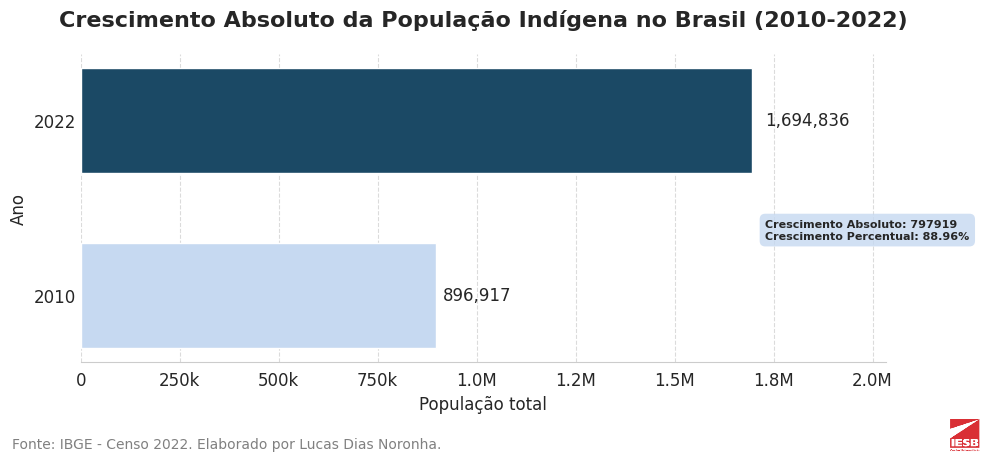

In [24]:
# --- Extrair Dados ---
anos = ['2010', '2022']
valores = [db_pais['Indígenas 2010 Total'].values[0],
    db_pais['Indígenas 2022 Total'].values[0]
]
localidade = db_pais['Localidade'].values[0]

# --- Estilo ---
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'DejaVu Sans',
    'axes.titlesize': 16,
    'axes.titleweight': 'bold'
})

# --- Criar gráfico horizontal ---
fig, ax = plt.subplots(figsize=(10, 5))
cores = ['#C6D9F1', '#1B4965']
bars = ax.barh(anos, valores, color=cores, height=0.6)

# --- Formatador para Milhões/Milhares ---
# Formata o eixo X para '1.7M' ou '897k'
def millions_formatter(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.1f}M' 
    elif x >= 1e3:
        return f'{x/1e3:.0f}k'
    else:
        return f'{x:,.0f}'

formatter = ticker.FuncFormatter(millions_formatter)

ax.xaxis.set_major_formatter(formatter)

# --- Adicionar valores exatos ao final das barras ---
for bar in bars:
    width = bar.get_width()

    # Adicionando o valor formatado com vírgula (ex: 1,693,535)
    ax.text(width * 1.02, # Posição um pouco à direita da barra
            bar.get_y() + bar.get_height()/2, # Centralizado verticalmente na barra
            f"{width:,.0f}", 
            ha='left', 
            va='center', 
            fontsize=12)

# --- Títulos e eixos ---
ax.set_title(f'Crescimento Absoluto da População Indígena no {localidade} (2010-2022)', pad=20)
ax.set_xlabel('População total')
ax.set_ylabel('Ano')

# --- Limpeza Visual ---
# Remover bordas desnecessárias (topo, direita, esquerda)
sns.despine(top=True, right=True, left=True, bottom=False)

# Manter o grid vertical (X) mas remover o horizontal (Y)
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.grid(False)

# Remover "ticks" (marquinhas) do eixo Y
ax.tick_params(axis='y', length=0)

# Garantir espaço para os rótulos de valor no final da barra
ax.set_xlim(right=max(valores) * 1.20)

# --- Fonte no canto inferior esquerdo ---
# Usando figtext para posicionamento relativo à figura
plt.figtext(0.02, 0.01, 'Fonte: IBGE - Censo 2022. Elaborado por Lucas Dias Noronha.', 
            ha='left', va='bottom', fontsize=10, color='gray')

# --- Adicionar logo no canto inferior direito ---
try:
    logo_path = '../assets/IESB_Logo.png'
    logo = plt.imread(logo_path)
    imagebox = OffsetImage(logo, zoom=0.30)
    ab = AnnotationBbox(imagebox, (0.98, 0.02), frameon=False, 
                        xycoords='figure fraction', box_alignment=(1,0))
    fig.add_artist(ab)
except FileNotFoundError:
    print("Arquivo de logo não encontrado. O logo não será adicionado.")

# --- Adicionar caixa de texto com resumo do crescimento ---
texto_resumo = (
    f"Crescimento Absoluto: {int(diferenca.iloc[0])}\n"
    f"Crescimento Percentual: {float(crescimento_pct.iloc[0]):.2f}%"
)

# Adicionar caixa de texto com resumo no gráfico
ax.text(0.85, 0.40, texto_resumo,
            transform=ax.transAxes,
            fontsize=8,
            fontweight='bold',

            # Cria uma caixa de fundo para melhor leitura
            bbox=dict(boxstyle='round,pad=0.5',
                       facecolor='#C6D9F1', 
                       alpha=0.8, 
                       edgecolor='none'))

# Ajustar layout para evitar sobreposição de títulos e fonte
plt.tight_layout(rect=[0, 0.05, 1, 0.93]) # Deixa espaço (topo/baixo)

# Salvar a imagem e exibir
plt.savefig('../reports/figures/grafico_crescimento_populacao_indigena_brasil_2010-2022.png', dpi=300, bbox_inches='tight')
plt.show()

### Análise dos resultados:

#### O quão grande ou significativo foi esse salto, comparado ao ponto de partida?

Vemos que o crescimento percentual dessa população foi de 88.96%, quase o dobro da população inicial nesses 12 anos. Um salto dessa magnitude sinaliza que algo profundo está acontecendo. No caso do Censo 2022, os analistas apontam que isso se deve a uma combinação de fatores:

Melhora na Coleta: O IBGE aperfeiçoou a forma de perguntar e recensear em territórios indígenas.

Aumento da Autodeclaração: Mais pessoas que vivem fora de terras indígenas (em cidades, por exemplo) passaram a se reconhecer e a se autodeclarar como indígenas, um fenômeno de valorização da identidade.

Crescimento Demográfico: Taxas de natalidade reais.

#### As pessoas se identificam mais como indígena?
Observa-se que, ao longo do período de 12 anos, houve um crescimento absoluto de aproximadamente [798.000] indivíduos na população indígena do Brasil. Este aumento pode refletir tanto a expansão demográfica quanto um maior número de pessoas que passaram a se identificar como indígenas.

Historicamente, muitos indivíduos de origem indígena ocultavam sua ancestralidade devido ao preconceito estrutural presente na sociedade, que frequentemente desvalorizava ou estigmatizava essas identidades. O crescimento registrado pode, portanto, também ser resultado de políticas públicas voltadas à valorização e visibilidade dos povos indígenas, bem como de iniciativas promovidas por movimentos sociais e organizações da sociedade civil, que reforçaram o reconhecimento de direitos e estimularam o resgate do orgulho cultural entre aqueles que anteriormente se sentiam compelidos a ocultar sua origem.

Dessa forma, os dados refletem não apenas mudanças demográficas, mas também transformações sociais e culturais que influenciam a forma como os indivíduos se identificam etnicamente.

Além dos fatores étnicos, podemos entender que o aumento desta parcela da população gera um aumento na necessidade de serviços e recursos básicos como saúde, educação, infraestrutura, mostrando o tamanho do desafio.


## Comparativo Nacional em relação as Áreas Urbanas e Rural

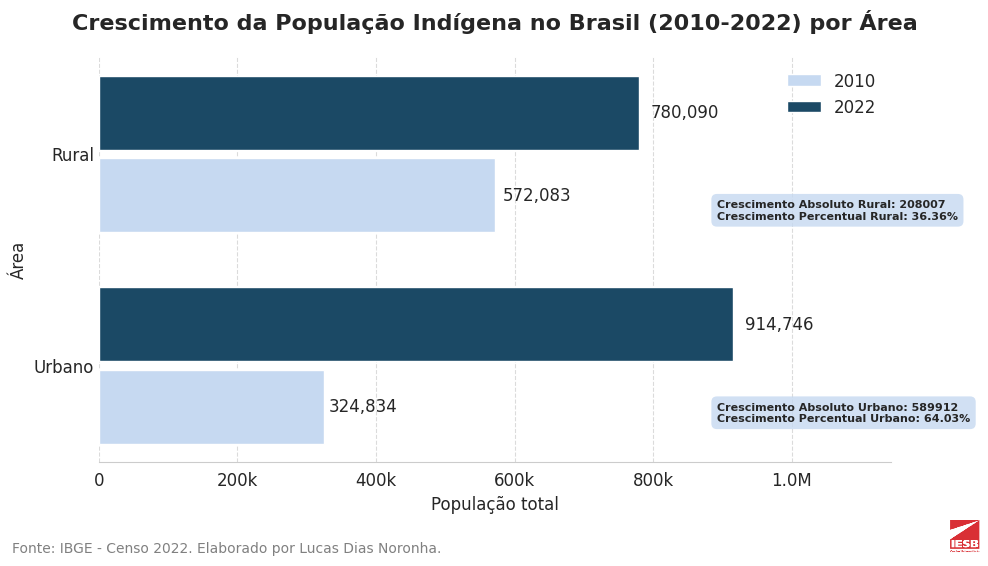

In [43]:
# --- Cálculos para Urbano e Rural ---

# Diferença entre indígenas em 2022 - 2010 (Urbano)
diferenca_urbano = db_pais['Indígenas 2022 Urbano'] - db_pais['Indígenas 2010 Urbano']
crescimento_pct_urbano = (diferenca / db_pais['Indígenas 2010 Urbano']) * 100 # Crescimento percentual

# Diferença entre indígenas em 2022 e 2010 (Rural)
diferenca_rural = db_pais['Indígenas 2022 Rural'] - db_pais['Indígenas 2010 Rural']
crescimento_pct_rural = (diferenca / db_pais['Indígenas 2010 Rural']) * 100 # Crescimento percentual

# --- Dados ---
# O eixo Y agora será a Área, e as barras serão os Anos
categorias = ['Urbano', 'Rural']
localidade = db_pais['Localidade'].values[0]

# Extrai os valores de 2010
valores_2010 = [
    db_pais['Indígenas 2010 Urbano'].values[0],
    db_pais['Indígenas 2010 Rural'].values[0]
]

# Extrai os valores de 2022
valores_2022 = [
    db_pais['Indígenas 2022 Urbano'].values[0],
    db_pais['Indígenas 2022 Rural'].values[0]
]

# --- Estilo ---
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'DejaVu Sans',
    'axes.titlesize': 16,
    'axes.titleweight': 'bold'
})

# --- Criar gráfico horizontal com barras lado a lado ---
fig, ax = plt.subplots(figsize=(10, 6))

n_categorias = len(categorias)
y_pos = np.arange(n_categorias)  # posições das barras (Urbano, Rural)
height = 0.35  # altura das barras individuais
gap = 0.02     # pequeno espaço entre barras lado a lado

# Deslocamento para 2010 e 2022
# Usamos as cores do seu primeiro gráfico para consistência
ax.barh(y_pos - height/2 - gap, valores_2010, height=height, color='#C6D9F1', label='2010')
ax.barh(y_pos + height/2 + gap, valores_2022, height=height, color='#1B4965', label='2022')

# --- Adicionar valores ao final das barras ---
for i in range(n_categorias):
    # Rótulos para 2010
    ax.text(valores_2010[i]*1.02, y_pos[i] - height/2 - gap, f"{valores_2010[i]:,.0f}", 
            va='center', ha='left', fontsize=12)
    # Rótulos para 2022
    ax.text(valores_2022[i]*1.02, y_pos[i] + height/2 + gap, f"{valores_2022[i]:,.0f}", 
            va='center', ha='left', fontsize=12)

# --- Configurações do eixo ---
ax.set_yticks(y_pos)
ax.set_yticklabels(categorias) # Agora mostra 'Urbano' e 'Rural'
ax.set_xlabel('População total')
ax.set_ylabel('Área') # Eixo Y agora é a Área
ax.set_title(f'Crescimento da População Indígena no {localidade} (2010-2022) por Área', pad=20)

# Formatador eixo X
def millions_formatter(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.1f}M'
    elif x >= 1e3:
        return f'{x/1e3:.0f}k'
    else:
        return f'{x:,.0f}'

ax.xaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# --- Grid e estilo ---
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False)
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.grid(False)
ax.tick_params(axis='y', length=0)
ax.set_xlim(right=max(max(valores_2010), max(valores_2022)) * 1.25)

# --- Legenda ---
# A legenda agora mostra '2010' e '2022'
ax.legend(frameon=False) 

# --- Fonte no rodapé esquerdo ---
plt.figtext(0.02, 0.01, 'Fonte: IBGE - Censo 2022. Elaborado por Lucas Dias Noronha.', 
            ha='left', va='bottom', fontsize=10, color='gray')

# --- Logo no rodapé direito ---
try:
    logo_path = '../assets/IESB_Logo.png' # Caminho original
    logo = plt.imread(logo_path)
    imagebox = OffsetImage(logo, zoom=0.30) # Zoom original
    ab = AnnotationBbox(imagebox, (0.98, 0.02), frameon=False, 
                        xycoords='figure fraction', box_alignment=(1,0))
    fig.add_artist(ab)
except FileNotFoundError:
    print("Arquivo de logo não encontrado. O logo não será adicionado.")


# --- Adicionar caixa de texto com resumo do crescimento ---
texto_resumo_urbano = (
    f"Crescimento Absoluto Urbano: {int(diferenca_urbano.iloc[0])}\n"
    f"Crescimento Percentual Urbano: {float(crescimento_pct_urbano.iloc[0]):.2f}%"
)

texto_resumo_rural = (
    f"Crescimento Absoluto Rural: {int(diferenca_rural.iloc[0])}\n"
    f"Crescimento Percentual Rural: {float(crescimento_pct_rural.iloc[0]):.2f}%"
)

# Adicionar caixa de texto com resumo no gráfico
ax.text(0.78, 0.10, texto_resumo_urbano,
            transform=ax.transAxes,
            fontsize=8,
            fontweight='bold',

            # Cria uma caixa de fundo para melhor leitura
            bbox=dict(boxstyle='round,pad=0.5',
                       facecolor='#C6D9F1', 
                       alpha=0.8, 
                       edgecolor='none'))

# Adicionar caixa de texto com resumo no gráfico
ax.text(0.78, 0.60, texto_resumo_rural,
            transform=ax.transAxes,
            fontsize=8,
            fontweight='bold',

            # Cria uma caixa de fundo para melhor leitura
            bbox=dict(boxstyle='round,pad=0.5',
                       facecolor='#C6D9F1', 
                       alpha=0.8, 
                       edgecolor='none'))

plt.tight_layout(rect=[0, 0.05, 1, 0.95]) # Layout original

# Sugiro um novo nome de arquivo para refletir o novo gráfico
plt.savefig('../reports/figures/grafico_crescimento_pop_indigena_por_area.png', dpi=300, bbox_inches='tight')
plt.show()

### Análise dos resultados:

#### Quão grande foi aumento de indigenas vivendo em áreas urbanas? Por que houve esse aumento?

Entre 2010 e 2022, o número de indígenas vivendo em áreas urbanas quase triplicou, apresentando um aumento de 181,60%, equivalente a 589.912 pessoas. Tal crescimento evidencia um intenso processo de migração dos povos indígenas para os centros urbanos, mas não pode ser explicado apenas pelo movimento populacional. Fatores culturais e sociais desempenham papel determinante nesse fenômeno.

O aumento reflete, em grande medida, a valorização da identidade étnica: muitos indígenas que anteriormente não se autodeclaravam passaram a fazê-lo, impulsionados tanto pela melhoria na coleta de dados do IBGE quanto pelo fortalecimento da consciência cultural e étnica. Ademais, o crescimento urbano evidencia uma maior integração dos indígenas à sociedade, buscando melhores condições de educação, saúde, lazer, segurança e infraestrutura.

Políticas públicas voltadas à população indígena, aliadas a uma maior visibilidade de sua cultura, contribuíram para esse cenário. O aumento é, portanto, menos um reflexo de nascimento natural ou migração direta das aldeias para as cidades e mais um fenômeno de autodeclaração e retomada de identidade. Essa tendência desconstrói a ideia de que "indígenas vivem apenas em aldeias", mostrando que há uma população urbana significativa que se reconecta com suas raízes e reivindica sua identidade. Dos 796 mil indígenas que surgiram estatisticamente entre os dois censos, aproximadamente 590 mil residem em áreas urbanas — ou seja, três em cada quatro.

### O que evidencia o aumento de indigenas em áreas rurais? 

Durante esses 12 anos, houve um aumento de 208,007 pessoas, um aumento de 36.36%. Um crescimento de 36,36% em 12 anos é muito robusto. Ele provavelmente reflete uma combinação. O aumento de indigenas em áreas rurais nos mostra não apenas uma aumento da população, mas um possível aumento da natalidade, um maior acesso a programas do governo, proteção de suas terras, acesso a saúde, educação, segurança. Muitos indigenas, mesmo vivendo em áreas rurais, vão a cidade frequentemente em busca desses serviços. O IBGE melhorou sua capacidade de recensear áreas de difícil acesso. Pessoas em áreas rurais (mas fora de terras demarcadas) também podem estar se declarando mais. Mesmo com todo o crescimento urbano, a população rural (que inclui as Terras Indígenas demarcadas) continua crescendo fortemente, mostrando a vitalidade demográfica dessas comunidades.

### O que isso gera?

O aumento expressivo da população indígena, sobretudo em áreas urbanas, evidencia a necessidade de políticas públicas que considerem suas especificidades culturais, sociais e econômicas. Torna-se imperativo fortalecer programas de saúde, educação, moradia e proteção cultural, tanto nas cidades quanto nas áreas rurais, assegurando que os direitos dessa população sejam plenamente atendidos.

O fenômeno observado aponta, sobretudo, para uma retomada identitária urbana: o "boom" indígena no Brasil não se limita à expansão numérica, mas reflete uma reconexão das populações indígenas com suas origens e a afirmação de sua identidade nas cidades.


## Comparativo Nacional absoluto vivendo dentro e fora de terras indigenas

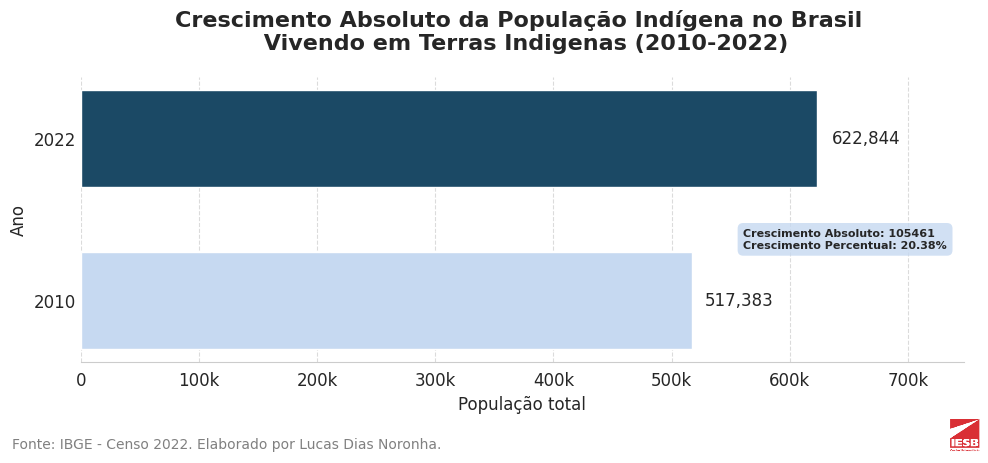

In [47]:
# --- Cálculos para População em Terras Indígenas ---
# Cálculo da diferença absoluta
diferenca = db_pais['Indígenas 2022 TI Total'] - db_pais['Indígenas 2010 TI Total']

# Cálculo do crescimento percentual
crescimento_pct = (diferenca / db_pais['Indígenas 2010 TI Total']) * 100


# --- Extrair Dados ---
anos = ['2010', '2022']
valores = [
    db_pais['Indígenas 2010 TI Total'].values[0],
    db_pais['Indígenas 2022 TI Total'].values[0]
]
localidade = db_pais['Localidade'].values[0]

# --- Estilo ---
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'DejaVu Sans',
    'axes.titlesize': 16, # Título principal maior
    'axes.titleweight': 'bold'
})

# --- Criar gráfico horizontal ---
fig, ax = plt.subplots(figsize=(10, 5)) # Ajustei o tamanho
cores = ['#C6D9F1', '#1B4965']
bars = ax.barh(anos, valores, color=cores, height=0.6) # Barras mais espessas

# --- Formatador para Milhões/Milhares ---
# Formata o eixo X para '1.7M' ou '897k'
def millions_formatter(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.1f}M' # Ex: 1.7M
    elif x >= 1e3:
        return f'{x/1e3:.0f}k' # Ex: 897k
    else:
        return f'{x:,.0f}'

formatter = ticker.FuncFormatter(millions_formatter)
ax.xaxis.set_major_formatter(formatter)

# --- Adicionar valores exatos ao final das barras ---
for bar in bars:
    width = bar.get_width()
    # Adicionando o valor formatado com vírgula (ex: 1,693,535)
    ax.text(width * 1.02, # Posição um pouco à direita da barra
            bar.get_y() + bar.get_height()/2, # Centralizado verticalmente na barra
            f"{width:,.0f}", 
            ha='left', 
            va='center', 
            fontsize=12)

# --- Títulos e eixos ---
ax.set_title(f'Crescimento Absoluto da População Indígena no {localidade} \n Vivendo em Terras Indigenas (2010-2022)', pad=20)
ax.set_xlabel('População total')
ax.set_ylabel('Ano')

# --- Limpeza Visual ---
# Remover bordas desnecessárias (topo, direita, esquerda)
sns.despine(top=True, right=True, left=True, bottom=False)
# Manter o grid vertical (X) mas remover o horizontal (Y)
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.grid(False)
# Remover "ticks" (marquinhas) do eixo Y
ax.tick_params(axis='y', length=0)

# Garantir espaço para os rótulos de valor no final da barra
ax.set_xlim(right=max(valores) * 1.20)

# --- Fonte no canto inferior esquerdo ---
# Usando figtext para posicionamento relativo à figura
plt.figtext(0.02, 0.01, 'Fonte: IBGE - Censo 2022. Elaborado por Lucas Dias Noronha.', 
            ha='left', va='bottom', fontsize=10, color='gray')

try:
    logo_path = '../assets/IESB_Logo.png'
    logo = plt.imread(logo_path)
    imagebox = OffsetImage(logo, zoom=0.30)
    ab = AnnotationBbox(imagebox, (0.98, 0.02), frameon=False, 
                        xycoords='figure fraction', box_alignment=(1,0))
    fig.add_artist(ab)
except FileNotFoundError:
    print("Arquivo de logo não encontrado. O logo não será adicionado.")


# --- Adicionar caixa de texto com resumo do crescimento ---
texto_resumo = (
    f"Crescimento Absoluto: {int(diferenca.iloc[0])}\n"
    f"Crescimento Percentual: {float(crescimento_pct.iloc[0]):.2f}%"
)

# Adicionar caixa de texto com resumo no gráfico
ax.text(0.75, 0.40, texto_resumo,
            transform=ax.transAxes,
            fontsize=8,
            fontweight='bold',

            # Cria uma caixa de fundo para melhor leitura
            bbox=dict(boxstyle='round,pad=0.5',
                       facecolor='#C6D9F1', 
                       alpha=0.8, 
                       edgecolor='none'))


# Ajustar layout para evitar sobreposição de títulos e fonte
plt.tight_layout(rect=[0, 0.05, 1, 0.93]) # Deixa espaço (topo/baixo)

# Salvar a imagem e exibir
plt.savefig('../reports/figures/grafico_crescimento_populacao_indigena_brasil_em_ti_2010-2022.png', dpi=300, bbox_inches='tight')
plt.show()

# Análise dos Resultados:

